# Duomenų krautuvas

Mūsų duomenys yra saugomo `.png` failu formatu, visi duomenys yra išskirstyti į 3 katalogus skirtingos fazėms. Turime šiuos katalogus su png failais:

 - <code>**mnist_test**</code>
 - <code>**mnist_train**</code>
 - <code>**mnist_valid**</code>
 
 Failai nėra padalinti 70:20:10 , train:test:validate proporcijomis. Nes tai labai mažas duomenų rinkinys kiekviename kataloge yra po <code>**256**</code> pavyzdžius, tikrajame MNIST duomenų rinkinyje yra 50 tks. pavyzdžių treniravimui ir 10 tks. pavyzdžių testavimui. Tai pat turime tris `.csv` failus. Tai yra lentelės, kuriose saugomi vaizdų pavadinimai su susijusiomis kategorijų etiketėmis:
 
 - <code>**mnist_test.csv**</code>
 - <code>**mnist_train.csv**</code>
 - <code>**mnist_valid.csv**</code>
 
 Žinoma jeigu norima galima viską sudėti į vieną kataloga ir tuomet redaguoti .csv failą kuriame bus sužymėti treniravimo, testavimo ir validavimo duomenys. Yra ne vienas budas paruošti duomenų rinkinį, tai priklauso nuo to kaip patogiau ir greičiau galėsite atlikti savo uždavinius.

## Duomenų rinkinio tikrinimas

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
BASEDIR = '/content/drive/My Drive/Colab Notebooks/'
DATADIR = f'{BASEDIR}/dataloader'

In [2]:
import warnings
warnings.filterwarnings('ignore')

Naudosime labai patogią python biblioteka atvaizdams <code>**Pillow**</code>, jeigu jos neturime ją galima sudiegti su komanda `pip install pillow`, kažkada ši biblioteka buvo integruota į python. Daugiau informacijos apie biblioteka rasite [čia](https://pillow.readthedocs.io/en/stable/)

In [11]:
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

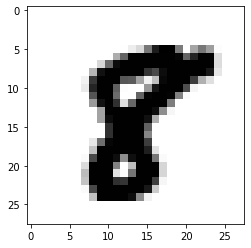

In [9]:
im = Image.open(f'{DATADIR}/mnist_train/1.png')
plt.imshow(im, cmap='binary');

In [12]:
im_array = np.array(im)
print('Masyvo matmenys', im_array.shape)
print()
print(im_array)

Masyvo matmenys (28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1  18  38 136 227 255
  254 132   0  90 136  98   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  82 156 253 253 253 253 253
  253 249 154 219 253 253  35   0   0   0]
 [  0   0   0   0   0   0   0   0   0  40 150 244 253 253 253 253 253 253
  253 253 253 253 253 253  35   0   0   0]
 [  0   0   0   0   0   0   0   0  74 

In [13]:
df_train = pd.read_csv(f'{BASEDIR}/mnist_train.csv')
print(df_train.shape)
df_train.head()

(256, 2)


,Class Label,File Name
0,5,0.png
1,8,1.png
2,8,2.png
3,0,3.png
4,9,4.png


In [7]:
df_valid = pd.read_csv(f'{BASEDIR}/mnist_valid.csv')
print(df_valid.shape)
df_valid.head()

(256, 2)


,Class Label,File Name
0,0,256.png
1,8,257.png
2,7,258.png
3,4,259.png
4,7,260.png


In [14]:
df_test = pd.read_csv(f'{BASEDIR}/mnist_test.csv')
print(df_test.shape)
df_test.head()

(256, 2)


,Class Label,File Name
0,4,512.png
1,0,513.png
2,6,514.png
3,8,515.png
4,4,516.png


## Duomenų rinkinio klasė

Kad galėtume naudoti duomenų krautuvą mums reikės specialios klasės `Dataset`. Žemiau yra šios klasės konstrukcija.

 - <code>**python klasės**</code> bendra informacija apie klases yra [čia](https://docs.python.org/3/tutorial/classes.html)
 - <code>**os modulis**</code> apie operacinės sistemos sąsaja pasiskaityti [čia](https://docs.python.org/3/library/os.html)
 - <code>**PyTorch Dataset klasė**</code> oficiali dokumentacija [čia]( https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [9]:
import os
import torch
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset

class ManoDuomenys(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
    
        df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.img_names = df['File Name']
        self.y = df['Class Label']
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_dir, self.img_names[index]))
        
        if self.transform is not None:
            img = self.transform(img)
        
        label = self.y[index]
        return img, label

    def __len__(self):
        return self.y.shape[0]

## Duomenų krautuvas

Krautuvas mums reikalingas duomenų krautuvas kad sukurti ir užktrautu mini pakuotes. Daugiau informacijos apie jo veikimo ypatybes ir charakteristikas rasite [čia](https://pytorch.org/docs/stable/data.html)

In [10]:
from torchvision import transforms
from torch.utils.data import DataLoader

# Pastaba dėl transforms.ToTensor()
# viduje jau dalija pikselius iš 255. 
# transforms.Lambda(lambda x: x/255.)
# techniškai atliekia įvesties normalizacija

totensor      = transforms.Compose([transforms.ToTensor()])

train_dataset = ManoDuomenys(csv_path=f'{BASEDIR}/mnist_train.csv',img_dir=f'{DATADIR}/mnist_train', transform=totensor)
train_loader  = DataLoader(dataset=train_dataset, batch_size=32, drop_last=True, shuffle=True, num_workers=0) 

valid_dataset = ManoDuomenys(csv_path=f'{BASEDIR}/mnist_valid.csv',img_dir=f'{DATADIR}/mnist_valid',transform=totensor)
valid_loader  = DataLoader(dataset=valid_dataset, batch_size=100, shuffle=False, num_workers=0)

test_dataset  = ManoDuomenys(csv_path=f'{BASEDIR}/mnist_test.csv', img_dir=f'{DATADIR}/mnist_test', transform=totensor)
test_loader   = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False, num_workers=0)

## Iteracija per duomenų rinkinį

In [12]:
num_epochs = 2
torch.manual_seed(0)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for epoch in range(num_epochs):
    for batch_idx, (X, y) in enumerate(train_loader): 
        print(f'epoch: {epoch+1} | batch index: {batch_idx} | batch size: {y.size()[0]}')
        
        X = X.to(device)
        y = y.to(device)

Epoch: 1 | Batch index: 0 | Batch size: 32
Epoch: 1 | Batch index: 1 | Batch size: 32
Epoch: 1 | Batch index: 2 | Batch size: 32
Epoch: 1 | Batch index: 3 | Batch size: 32
Epoch: 1 | Batch index: 4 | Batch size: 32
Epoch: 1 | Batch index: 5 | Batch size: 32
Epoch: 1 | Batch index: 6 | Batch size: 32
Epoch: 1 | Batch index: 7 | Batch size: 32
Epoch: 2 | Batch index: 0 | Batch size: 32
Epoch: 2 | Batch index: 1 | Batch size: 32
Epoch: 2 | Batch index: 2 | Batch size: 32
Epoch: 2 | Batch index: 3 | Batch size: 32
Epoch: 2 | Batch index: 4 | Batch size: 32
Epoch: 2 | Batch index: 5 | Batch size: 32
Epoch: 2 | Batch index: 6 | Batch size: 32
Epoch: 2 | Batch index: 7 | Batch size: 32


<code>**NCWH**</code>

In [13]:
print(X.shape)

torch.Size([32, 1, 28, 28])


\begin{multline*}
\mathbb{R}^{\ n \ \times \ c \ \times \ w \ \times  \ h} \rightarrow \mathbb{R}^{\ n \times m}
\end{multline*}

Su tokiu formatu gali dirbti konvoliuciniai neuroniniai tinklai, tačiau daugiasluoksnis perceptronas negali todėl reikia atlikti įvesties konversiją.

<code>**NCWH ➜ R^MN**</code>

In [14]:
X_matrix = X.view(-1, 28*28)
print(X_images_as_vector.shape)

torch.Size([32, 784])


In [15]:
X_matrix

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
for row in X_matrix:
    print(row)